# How Overnight Stay Choices at US National Parks Changed Overtime?

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

% matplotlib inline

In [216]:
visits = pd.read_excel('visitation.xlsx').fillna(0).drop(columns=['Average'])
visits.head(10)

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,200404.00,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580
1,Acadia NP,2594497.00,2602227.00,2469238.00,2516551.00,2558572.00,2431062.00,2207847.00,2051484.00,2083588.00,...,2075857.00,2227698.00,2504208.00,2374645.00,2431052.00,2254922.00,2563129.00,2811184.00,3303393.00,3509271
2,Adams NHP,63569.00,84574.00,87347.00,167500.00,173944.00,215659.00,239504.00,220467.00,225318.00,...,241536.00,253656.00,73339.00,219975.00,336031.00,285501.00,178468.00,183632.00,199301.00,255562
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,117113.00,108585.00,77624.00,93234.00,54861.00,56348.00,46526.00,43182
4,Agate Fossil Beds NM,17594.00,18117.00,17933.00,17399.00,17129.00,16233.00,15235.00,14209.00,13521.00,...,12425.00,12694.00,12509.00,11617.00,11824.00,10504.00,12440.00,13264.00,15555.00,32038
5,Alibates Flint Quarries NM,3293.00,3047.00,3131.00,2456.00,2125.00,1811.00,2012.00,2919.00,1882.00,...,2297.00,2918.00,4350.00,3214.00,3383.00,1555.00,4513.00,9492.00,8153.00,6613
6,Allegheny Portage Railroad NHS,111100.00,111391.00,133396.00,142340.00,146484.00,129995.00,126441.00,115357.00,121009.00,...,113991.00,118931.00,107363.00,118410.00,138864.00,107977.00,172883.00,168433.00,189371.00,201837
7,Amistad NRA,1129811.00,1164166.00,1234506.00,1097650.00,1047784.00,1071199.00,1445772.00,1399852.00,1599271.00,...,1980717.00,2573966.00,1574322.00,1436759.00,1367502.00,1025151.00,1130096.00,1250051.00,1164530.00,1221635
8,Andersonville NHS,225653.00,182539.00,167373.00,160974.00,190004.00,150661.00,165929.00,132466.00,132153.00,...,159592.00,136267.00,121535.00,108812.00,122883.00,98771.00,127189.00,136686.00,134216.00,132149
9,Andrew Johnson NHS,60207.00,51779.00,59897.00,49551.00,48878.00,51910.00,50196.00,48552.00,50701.00,...,69433.00,63296.00,60323.00,52322.00,51261.00,42929.00,42863.00,45357.00,45937.00,53998


In [217]:
years = list(visits.columns.values)[1:]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [218]:
#Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#wide to long data form
visits = pd.melt(visits, id_vars='Park Name', value_vars=years)



In [221]:
#changing column name
visits.rename(columns={'variable': 'Year', 'value': 'Visits'}, inplace=True)

In [222]:
visits.head()

,Park Name,Year,Visits
0,Abraham Lincoln Birthplace NHP,1998,250842.00
1,Acadia NP,1998,2594497.00
2,Adams NHP,1998,63569.00
3,African Burial Ground NM,1998,0.00
4,Agate Fossil Beds NM,1998,17594.00


## Part 1: How Does the Number of Visits to the US National Parks Changed Overtime?

In [223]:
from matplotlib.ticker import FuncFormatter

#step1: build a function
# it should take value and pos
def with_commas(value,x_pos):
    
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)



In [231]:
visits['date_year'] = pd.to_datetime(visits['Year'],format = '%Y')

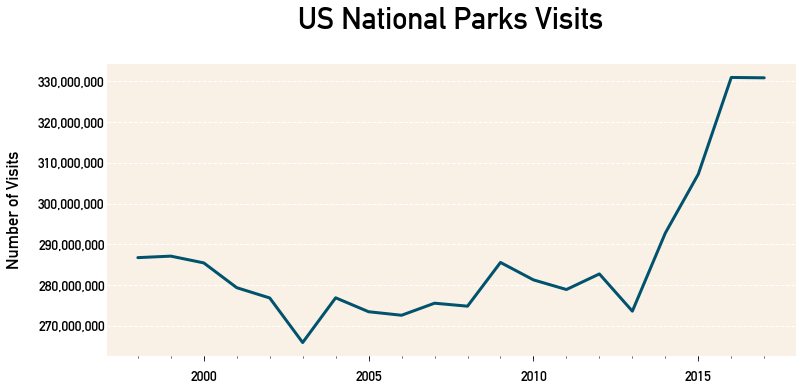

In [243]:
ax = visits.groupby('date_year').Visits.sum().plot(x='Year',kind = 'line',figsize=(11,5))
ax.yaxis.set_major_formatter(formatter)
ax.set_title("US National Parks Visits",pad = 35,loc='center',fontsize=30)

ax.grid(False, axis='x')
ax.set_ylabel("Number of Visits",labelpad = 15)
ax.set_xlabel("")
#ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()

#set number of tickers




plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )
plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN Alternate' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#00526d','#f0bb7f','#d9816b','#90ced6','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',

    'xtick.major.pad': 10,
    'ytick.major.pad': 35,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 5,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,

 
  'figure.facecolor': 'FFFFFF',
})
plt.savefig("graph_visits.pdf",bbox_inches='tight')
plt.savefig('graph_visits.png',bbox_inches='tight')
plt.show()

## Part 2: What is people's favourite overnight stays options? How do the preferences change over time?

In [72]:
overnights['date_year'] = pd.to_datetime(overnights['Year'],format = '%Y')

In [77]:
overnights=overnights.drop(columns=['Year'])

In [105]:
overnights.tail()

,Concessioner Lodging,Concessioner Campers,Tent Campers,RV Campers,Backcountry Campers,date_year
16,3574734,1008618,3326852,2404840,2032886,2001-01-01
17,3678262,999658,3395816,2501401,1935276,2000-01-01
18,3676049,1101517,3544605,2652773,1968930,1999-01-01
19,3612940,1078800,3457825,2630972,2056747,1998-01-01
20,3562564,1023736,3589246,2707618,2169296,1997-01-01


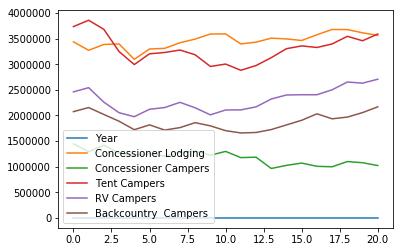

In [46]:
overnights = pd.read_excel('overnights_choices.xlsx')

overnights.plot()

In [79]:
from matplotlib.ticker import FuncFormatter

#step1: build a function
# it should take value and pos
def with_commas(value,x_pos):
    
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)



In [163]:
yearlist = []
n=1997
for i in range(21):
    yearlist.append(str(n)+'-01-01')
    n += 1
yearlist

['1997-01-01',
 '1998-01-01',
 '1999-01-01',
 '2000-01-01',
 '2001-01-01',
 '2002-01-01',
 '2003-01-01',
 '2004-01-01',
 '2005-01-01',
 '2006-01-01',
 '2007-01-01',
 '2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-01']

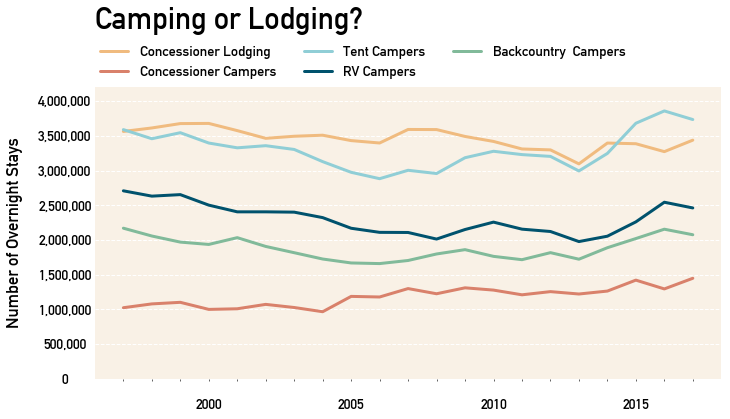

In [203]:
ax = overnights.plot(x='date_year',figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)


# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_title("Camping or Lodging?",pad = 58,loc='left',fontsize=30)
ax.legend(bbox_to_anchor=(0, 1.01, 1., .15), loc=3,
           ncol=3, borderaxespad=0)
ax.grid(False, axis='x')
ax.set_ylabel("Number of Overnight Stays",labelpad = 15)
ax.set_xlabel("")
ax.set_ylim(0,4200000)

ax.xaxis.tick_bottom()

#set number of tickers

ax.set_xticks(yearlist,minor=True)


plt.setp( ax.yaxis.get_majorticklabels(), ha="center" )



plt.rcParams.update({
  'lines.linewidth': 3,
  'lines.solid_capstyle': 'round',
  'font.family':'DIN Alternate' ,
  'font.stretch':'normal',
  'legend.fancybox': False,
  'legend.frameon':False,
  'axes.prop_cycle': cycler('color', ['#f0bb7f','#d9816b','#90ced6','#00526d','#81ba9a','#f15b40']),
  'axes.facecolor': '#f9f1e6',
'axes.grid': True,
  'axes.labelsize': 'large',
  'axes.axisbelow': True,
  'axes.formatter.limits':[-20,20],
  'axes.edgecolor': '#00526d',
  'axes.linewidth': 1.0,
  'axes.titlesize': 'x-large',
    'axes.spines.left'   : False,
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
 
  'grid.linestyle': '--',
  'grid.linewidth': 1.0,
  'grid.color': '#FFFFFF',
    'xtick.top'           : True,
    'xtick.major.pad': 20,
    'ytick.major.pad': 30,
    'ytick.left'           : True,
    'ytick.direction'      : 'out',
  'xtick.major.size': 0,
  'xtick.minor.size': 2,
  'ytick.major.size': 0,
  'ytick.minor.size': 0,
    'xtick.minor.visible'  : True,
  'font.size': 14.0,

 
  'figure.facecolor': 'FFFFFF',
})


# then we save it
plt.savefig("graph_overnights_option.pdf",bbox_inches='tight')
plt.savefig('graph_overnights_option.png',bbox_inches='tight')
plt.show()

## Part 3: How much time do people spent on their visits to National Park?

In [52]:
rec_hours = pd.read_excel('recreational_hours.xlsx').fillna(0)
rec_hours.head()

,Park Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
0,Abraham Lincoln Birthplace NHP,250842.00,251204.00,236180.00,229675.00,250772.00,211650.00,201828.00,190809.00,200054.00,...,221111.00,177122.00,163568.00,169515.00,163928.00,241264.00,148605.00,252495.00,269580,211677.80
1,Acadia NP,13838352.00,13910921.00,13230679.00,13467741.00,13683657.00,13012171.00,11822104.00,10568105.00,10720555.00,...,11447560.00,12827516.00,12101384.00,12458831.00,11347331.00,13085317.00,14452151.00,22698596.00,24014370,13532716.65
2,Adams NHP,58943.00,76985.00,77664.00,151073.00,156764.00,192381.00,199477.00,182457.00,186479.00,...,243357.00,87431.00,278448.00,406022.00,443617.00,210593.00,218988.00,212705.00,254438,202218.90
3,African Burial Ground NM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,57657.00,54996.00,43878.00,54711.00,34407.00,36820.00,32801.00,32539,43476.12
4,Agate Fossil Beds NM,41269.00,44590.00,43545.00,42226.00,39598.00,37710.00,37756.00,36811.00,33141.00,...,33053.00,31635.00,28542.00,28369.00,25684.00,31035.00,35051.00,38642.00,65694,36754.45


In [53]:
years = list(rec_hours.columns.values)[1:]
years

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 'Average']

In [54]:
#Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#wide to long data form
hours = pd.melt(rec_hours, id_vars='Park Name', value_vars=years)


In [60]:
hours.rename(columns={'variable': 'Year', 'Visits': 'Recreational Hours'}, inplace=True)

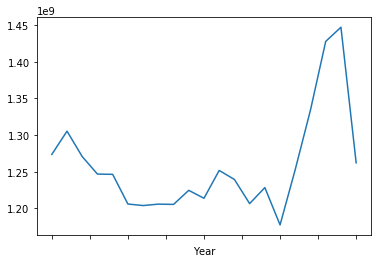

In [63]:
hours.groupby('Year')['Recreational Hours'].sum().plot()